# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

# Let us welcome SciPy!
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("./Temp_States.csv")


#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
temp_NY = temp.drop(temp.loc[temp['State']!="New York"].index)

In [6]:
temp_NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
temp_NY.mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
rows_t15 = temp.drop(temp.loc[temp['Temperature']<=15].index)


In [9]:
#rows_t15

In [10]:
rows_t15_cs = rows_t15.drop(['Temperature'], axis=1)

In [11]:
rows_t15_cs

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [12]:
rows_t15_c = rows_t15_cs.drop(['State'], axis=1)

In [13]:
rows_t15_c

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [14]:
# Nos aprovechamos de lo realizado anteriormente:

rows_t15_20 = rows_t15.drop(rows_t15.loc[rows_t15['Temperature']>=20].index)

In [15]:
rows_t15_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

#### STATE NEW YORK


In [16]:
temp_NY = temp.drop(temp.loc[temp['State']!="New York"].index)

mean

In [17]:
temp_NY.mean()

Temperature    10.740741
dtype: float64

standard deviation

In [18]:
temp_NY.std()

Temperature    8.133404
dtype: float64

#### STATE  Connecticut

In [19]:
temp_cc = temp.drop(temp.loc[temp['State']!="Connecticut"].index)

mean

In [20]:
temp_cc.mean()

Temperature    15.833333
dtype: float64

standard deviation

In [21]:
temp_cc.std()

Temperature    1.964186
dtype: float64

#### STATE New Jersey	

In [22]:
temp_nj = temp.drop(temp.loc[temp['State']!="New Jersey"].index)

mean

In [23]:
temp_nj.mean()

Temperature    21.111111
dtype: float64

standard deviation

In [24]:
temp_nj.std()

Temperature    1.571348
dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [25]:
employee = pd.read_csv("./employee.csv")

In [26]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [27]:
employee.dtypes


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

Como los años y salarios son los únicos que son números, serán los únicos respecto de los cuales podremos calcular la media y la desviacion típica.

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [28]:
#Años

<AxesSubplot:xlabel='Years', ylabel='Count'>

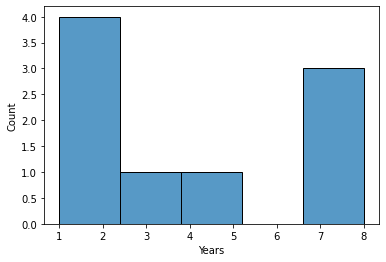

In [29]:
sns.histplot(employee.Years)

Lo más normal es que la gente este empezando a trabajar, pero también es frecuente que se lleven más de 7 años trabajando. Es decir la distribución está sobretodo en los extremos. 

In [30]:
#Salary

<AxesSubplot:xlabel='Salary', ylabel='Count'>

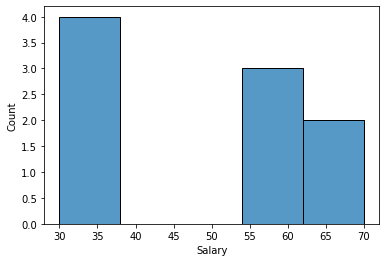

In [31]:
sns.histplot(employee.Salary)

Sigue una distribución que se concentra en los extremos.

#### What's the average salary in this company?

In [32]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [33]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [34]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [35]:
employee_ls = employee.drop(employee.loc[employee['Salary']!=(employee.Salary.min())].index)

In [36]:
employee_ls

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [37]:
# your answer here
e_david = employee.drop(employee.loc[employee['Name']!=("David")].index)

#### Could you give only David's salary?

In [38]:

e_david["Salary"]


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [39]:
rows_tittle = employee.drop(['Name', "Gender", "Years", "Salary"], axis=1)

In [40]:
rows_tittle

,Department,Education,Title
0,IT,Bachelor,analyst
1,IT,Master,analyst
2,HR,Master,analyst
3,HR,Bachelor,analyst
4,Sales,Master,associate
5,Sales,Bachelor,associate
6,IT,Master,VP
7,IT,Phd,associate
8,HR,Master,VP


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [41]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [42]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [43]:
# title is associate
employee_ass = employee.drop(employee.loc[employee['Title']!= "associate"].index)

In [44]:
employee_ass

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [45]:
# salary above 55
employee_ass_50 = employee_ass.drop(employee_ass.loc[employee_ass['Salary'] < 56].index)

In [46]:
employee_ass_50

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

<AxesSubplot:xlabel='Years', ylabel='Count'>

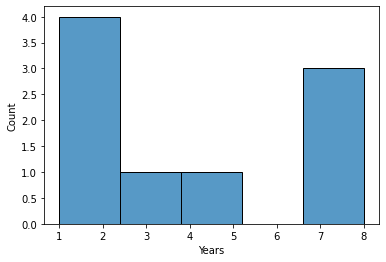

In [47]:
sns.histplot(employee.Years)

In [48]:
employee.groupby(["Years"]).mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [49]:
employeest = employee.groupby(["Title"]).mean()

In [50]:
employeest = employeest.drop(["Years"], axis=1)

In [51]:
employeest

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

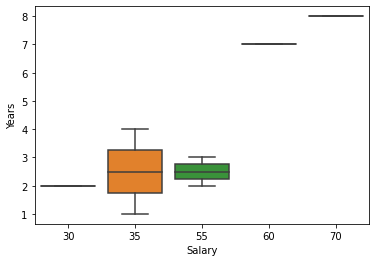

In [52]:
sns.boxplot(x="Salary",  
            data=employee, 
            y="Years")
plt.show()


In [53]:
# Prefiero hacerlo con los dos separados.

In [54]:
# Salary

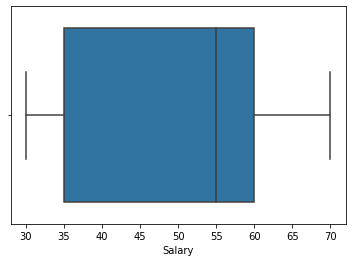

In [55]:
sns.boxplot(x="Salary",  
            data=employee)
plt.show()

In [56]:
# Years

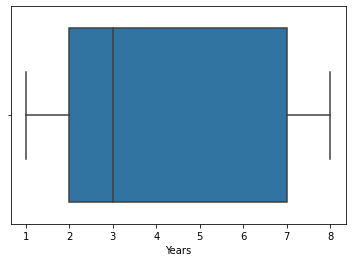

In [57]:
sns.boxplot(x="Years",  
            data=employee)
plt.show()

In [58]:
# print first quartile here

In [59]:
qs = employee.quantile([0.25, 0.5, 0.75])

In [60]:
qs.head(1)

,Years,Salary
0.25,2.0,35.0


In [61]:
# print third quartile here

In [62]:
qs.tail(1)

,Years,Salary
0.75,7.0,60.0


#### Is the mean salary per gender different?

In [63]:
# your answer here

employee.groupby(["Gender"]).mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


In [64]:
# Si, los hombres cobran más. 

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [65]:
#mean

In [66]:
employee.groupby(["Department"]).mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [67]:
#maximum

In [68]:
employee.groupby(["Department"]).max()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Sonia,Master,M,analyst,8,70
IT,Pedro,Phd,M,associate,8,70
Sales,Samuel,Master,M,associate,3,55


In [69]:
# minimun

In [70]:
employee.groupby(["Department"]).min()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Ana,Bachelor,F,VP,2,30
IT,Carlos,Bachelor,F,VP,1,30
Sales,Eva,Bachelor,F,associate,2,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [71]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [74]:
orders = pd.read_csv("./Orders.csv")

In [75]:
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [76]:
# your answer here

In [78]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [ ]:
# your answer here
Bastantes datos son numeros, por lo que vamos a poder calcular bastantes desviaciones típicas y medias. 

####  What is the average Purchase Price?

In [81]:
# your answer here

orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [82]:
# highest
orders.amount_spent.max()

168469.6

In [83]:
# lowest
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [96]:
# your answer here

c_spain = orders.drop(orders.loc[orders['Country']!="Spain"].index)

In [97]:
c_spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [99]:
# No hace falta customers id, la tabla de arriba ya nos dice que son 2485.

#### Select all the customers who have bought more than 50 items ?

In [101]:

c_50i = orders.drop(orders.loc[orders['Quantity']<=50].index)

In [102]:
c_50i

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [104]:
# your answer here

c_spain_50i = c_50i.drop(c_50i.loc[orders['Country']!="Spain"].index)

In [105]:
c_spain_50i

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [107]:

free_orders = orders.drop(orders.loc[orders['amount_spent']!=0].index)

In [108]:
free_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [154]:
lunch_bag = orders[orders["Description"].str.contains("lunch bag", na=False)]

In [155]:
lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199490,285436,561906,20725,2011,8,1,10,lunch bag red retrospot,20,2011-08-01 10:03:00,1.65,12921,United Kingdom,33.0
199491,285437,561906,20726,2011,8,1,10,lunch bag woodland,20,2011-08-01 10:03:00,1.65,12921,United Kingdom,33.0
199492,285438,561906,22382,2011,8,1,10,lunch bag spaceboy design,10,2011-08-01 10:03:00,1.65,12921,United Kingdom,16.5
199494,285440,561906,22384,2011,8,1,10,lunch bag pink polkadot,20,2011-08-01 10:03:00,1.65,12921,United Kingdom,33.0
199495,285441,561906,23206,2011,8,1,10,lunch bag apple design,20,2011-08-01 10:03:00,1.65,12921,United Kingdom,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226389,320564,565014,22384,2011,8,3,16,lunch bag pink polkadot,30,2011-08-31 16:28:00,1.65,16180,United Kingdom,49.5
226390,320565,565014,23209,2011,8,3,16,lunch bag vintage doily,30,2011-08-31 16:28:00,1.65,16180,United Kingdom,49.5
226391,320566,565014,20725,2011,8,3,16,lunch bag red retrospot,30,2011-08-31 16:28:00,1.65,16180,United Kingdom,49.5
226392,320567,565014,23206,2011,8,3,16,lunch bag apple design,30,2011-08-31 16:28:00,1.65,16180,United Kingdom,49.5


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [157]:
# your answer here

lunch_bag_2011 = lunch_bag.drop(lunch_bag.loc[lunch_bag['year']!=2011].index)

In [158]:
lunch_bag_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199490,285436,561906,20725,2011,8,1,10,lunch bag red retrospot,20,2011-08-01 10:03:00,1.65,12921,United Kingdom,33.0
199491,285437,561906,20726,2011,8,1,10,lunch bag woodland,20,2011-08-01 10:03:00,1.65,12921,United Kingdom,33.0
199492,285438,561906,22382,2011,8,1,10,lunch bag spaceboy design,10,2011-08-01 10:03:00,1.65,12921,United Kingdom,16.5
199494,285440,561906,22384,2011,8,1,10,lunch bag pink polkadot,20,2011-08-01 10:03:00,1.65,12921,United Kingdom,33.0
199495,285441,561906,23206,2011,8,1,10,lunch bag apple design,20,2011-08-01 10:03:00,1.65,12921,United Kingdom,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226389,320564,565014,22384,2011,8,3,16,lunch bag pink polkadot,30,2011-08-31 16:28:00,1.65,16180,United Kingdom,49.5
226390,320565,565014,23209,2011,8,3,16,lunch bag vintage doily,30,2011-08-31 16:28:00,1.65,16180,United Kingdom,49.5
226391,320566,565014,20725,2011,8,3,16,lunch bag red retrospot,30,2011-08-31 16:28:00,1.65,16180,United Kingdom,49.5
226392,320567,565014,23206,2011,8,3,16,lunch bag apple design,30,2011-08-31 16:28:00,1.65,16180,United Kingdom,49.5


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:xlabel='amount_spent', ylabel='Count'>

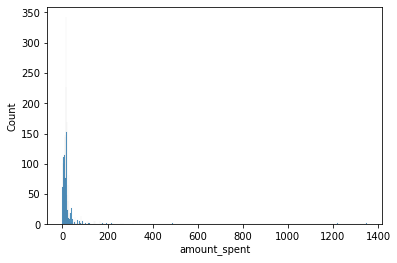

In [149]:
# your answer here

sns.histplot(c_spain.amount_spent)

#### Select all orders made in the month of August

In [126]:

august_orders = orders.drop(orders.loc[orders['month'] != 8].index)

In [127]:
august_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,NaN,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,NaN,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,NaN,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,NaN,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,NaN,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,NaN,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,NaN,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,NaN,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,NaN,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [134]:
august_orders_country = august_orders.groupby(["Country"]).count()

In [136]:
august_orders_country["Quantity"]

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: Quantity, dtype: int64

#### What's the  average amount of money spent by country

In [139]:
# your answer here

country_money = orders.groupby(["Country"]).mean()

In [141]:
country_money["amount_spent"]

Country
Australia          210.179439
Austria             17.228182
Belgium             18.319691
Canada              10.312000
Channel Islands     34.977000
Denmark             13.321875
EIRE                28.612782
Finland             22.565574
France              24.272337
Germany             24.177069
Iceland             26.586818
Israel              28.501813
Italy               20.957368
Malta               20.345455
Netherlands        144.027893
Norway              26.309221
Poland              23.635294
Portugal            29.790244
Spain               13.281389
Sweden              35.021500
Switzerland         18.613820
United Kingdom      21.573396
Unspecified         23.088261
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [142]:
orders.UnitPrice.max()

2500.0

#### What was the average amount spent per year ?

In [143]:
#Datos de last year

In [145]:

lastyear_orders = orders.drop(orders.loc[orders['year'] != 2020].index)

In [147]:
lastyear_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent


In [148]:
# 0 ya que el año pasado no ha habido gastos. 